#### 1. Importing the required libraries and functions

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score
from sklearn.metrics import roc_curve , auc
from sklearn.linear_model import LogisticRegression

import seaborn as sns

#### 2. Importing the dataset

In [2]:
data = pd.read_csv("data_ML/qsar_oral_toxicity.csv",sep=";")

In [3]:
data.head()
#to view the first 6 rows

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.962,0.963,0.964,0.965,0.966,0.967,0.968,0.969,0.970,negative
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,negative
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,negative
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,negative


#### 3. Data Pre-processing or Data Cleaning

In [10]:
data.isnull().sum()

0           0
0.1         0
0.2         0
0.3         0
0.4         0
           ..
0.967       0
0.968       0
0.969       0
0.970       0
negative    0
Length: 1025, dtype: int64

In [11]:
(data.isnull().sum()!=0).value_counts()

False    1025
dtype: int64

In [12]:
df = pd.DataFrame(data)
df
(df.duplicated().sum()==True)

False

##### Note: No further cleaning process done, as there are no missing values and duplicate data

#### 4. Data Exploration

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8991 entries, 0 to 8990
Columns: 1025 entries, 0 to negative
dtypes: int64(1024), object(1)
memory usage: 70.3+ MB


##### Note: There are 8991 observations and 1025 variables. 1024 variables are the binary molecular fingerprints and the 1025th variable is the response variable 'negative'.

In [14]:
data.negative.value_counts()

negative    8250
positive     741
Name: negative, dtype: int64

##### Note: Out of 8991 observations, 8250 are the observations that get negative response while 741 positive responses 

<AxesSubplot:title={'center':'Distribution of Oral Toxicity'}, ylabel='negative'>

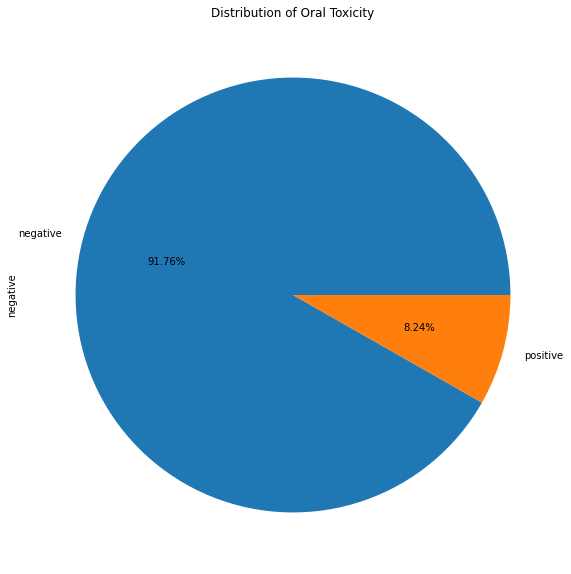

In [15]:
## Distribution of Oral Toxicity
plt.figure(figsize=(10,10))
plt.title("Distribution of Oral Toxicity")
data["negative"].value_counts().plot(kind="pie",autopct='%1.2f%%')

#### Above chart shows the distribution of oral toxicity by positive and negative responses

#### 5. Extracting the Dependent and Independet variables

In [18]:
x = data.drop("negative",axis=1)
x

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.961,0.962,0.963,0.964,0.965,0.966,0.967,0.968,0.969,0.970
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8986,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8987,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8988,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
y = data['negative'].replace(['negative', 'positive'],
                        [0, 1], inplace=True)
y = data['negative']
y

0       0
1       0
2       0
3       0
4       0
       ..
8986    0
8987    0
8988    0
8989    0
8990    0
Name: negative, Length: 8991, dtype: int64

##### Note: The dependent variable, 1024 binary molecular fingerprints were extracted and named as x while the response variable, 'negative' were extracted and names as y

### Logistic Regression
#### 6. Splitting train and test set

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

##### Note: Splitting the train and test set using the 80:20 rule for validation purposes and to find the test error

#### 7. Model Training

In [23]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##### Model training using training dataset

In [24]:
y_pred_train=model.predict(x_train)
print("accuracy score : ",accuracy_score(y_train,y_pred_train))

accuracy score :  0.9646829810901001


##### Model training using testing dataset

In [26]:
y_pred=model.predict(x_test)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1661
           1       0.52      0.41      0.46       138

    accuracy                           0.93      1799
   macro avg       0.74      0.69      0.71      1799
weighted avg       0.92      0.93      0.92      1799

Confusion matrix is 
 [[1610   51]
 [  82   56]]


Text(42.0, 0.5, 'predicted label')

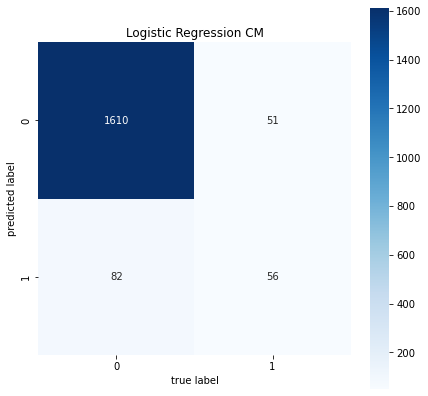

In [27]:
## classification report
print(classification_report(y_test,y_pred))

## confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
print("Confusion matrix is \n",conf_mat)

## plotting confusion matrix
plt.figure(figsize=(7,7))
plt.title("Logistic Regression CM")
sns.heatmap(conf_mat, square=True,cmap="Blues",annot=True,fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')

#### 8. Accuracy score

In [28]:
print("accuracy score : ",accuracy_score(y_test,y_pred))
print("accuracy:", round(100*accuracy_score(y_test,y_pred)),"%")

accuracy score :  0.9260700389105059
accuracy: 93 %


##### Note: The classification model using logistic regression has a  very good accuracy of 93%

#### 9. ROC Curve

In [30]:
y_pred_proba = model.predict_proba(x_test)[:,1]

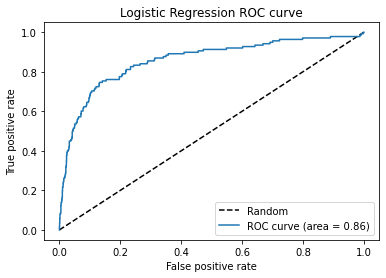

In [31]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc=auc(fpr,tpr)

plt.plot([0, 1], [0, 1], 'k--',label='Random')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc='best')

#### 10.Generating scikit-learn for Corss-Validation

In [33]:
pd.DataFrame(zip(x.columns, np.transpose(model.coef_)))
#coeeficients

,0,1
0,0,[0.2490398877504804]
1,0.1,[0.44305636828144845]
2,0.2,[0.5560524341318814]
3,0.3,[0.21848417333074568]
4,0.4,[-0.5579499377348893]
...,...,...
1019,0.966,[-0.15785095034920585]
1020,0.967,[0.18933083874674592]
1021,0.968,[-0.5282877504066344]
1022,0.969,[-0.989471108110225]


In [34]:
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(LogisticRegression(), x, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

[0.92555556 0.91657397 0.92213571 0.91212458 0.91212458 0.93548387
 0.91546162 0.93659622 0.91879867 0.92769744]
0.9222552218514398


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Note: The accuracy of the model is checked using the 10-fold cross-validation. For this, the ‘cross_val_score’ function was used. Based on the result, the accuracy is still the 92% which is almost the same as 93% hence this means the model is working fine

#### 11. Calculating test error rate

In [38]:
TER = (51+82)/len(y_test)
print("Test Error Rate:", round(100*TER),"%")

Test Error Rate: 7 %


##### Note: test error rate was calculated by dividing the number of all incorrect predictions by the total number of the dataset.

### Conclusion

#### Based on the cross-validation, it is found that the model is adequate enough to be used with higher test accuracy of 93% and very low test error rate of 7%. This emphasizes that classification using Logisitc Regression provide a high accuracy model.
